In [1]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

## Problem Statement

We will use the housing price preditction training dataset that contains three examples with four features(size, bedrooms, floors and age).

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

We will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  


In [6]:
X_train = np.array([[2104, 5, 1, 45], [1416,3,2,40], [852, 2,1,35]])
X_features = ['Size(sq ft)', '# bedrooms', '# floors', 'age of home' ]
y_train = np.array([460,232,178])

Text(0, 0.5, "Price (1000's of Dollor)")

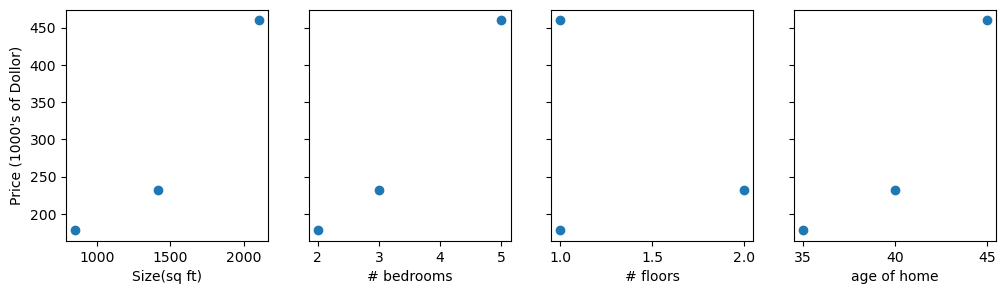

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel('Price (1000\'s of Dollor)')

Initialising $w,b$ vectors

In [4]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

## Making Prediction | vector operation

In [6]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction

    """
    p = np.dot(x, w) + b
    return p

In [9]:
# getting a row from our training array
x_vec = X_train[0]

# making prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"Prediction: {f_wb}")

Prediction: 459.9999976194083


## Computing Cost with Multiple Variables

In [12]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0

    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [14]:
compute_cost(X_train, y_train, w_init, b_init)

1.5578904045996674e-12

## Gradient Descent With Multiple Variables 

In [18]:
def compute_gradient(X, y, w, b):
    m, n = X.shape    # no. of traning sets(m), no. of features in each training example(n) 
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err *  X[i, j]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db     

In [22]:
# Compute and display gradient

tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)

print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


## Gradient Descent With Multiple Variables

In [28]:
def do_gradient_descent(X, y,  w_init, b_init, cost_function, gradient_function, alpha, num_iters):
    
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
    """
    cost_func_history = []
    w = copy.deepcopy(w_init)
    b = b_init

    for i in range(num_iters):
        dw, db = gradient_function(X, y, w, b)

        w = w - alpha * dw
        b = b - alpha * db

        if i < 100000:
            cost_func_history.append(cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_func_history[-1]:8.2f}   ")
        
    return w, b, cost_func_history #return final w,b and cost function history for graphing
        
    

In [39]:
initial_w = np.zeros_like(w_init)
initial_b = 0
iterations = 1000
alpha = 5.0e-7
w_final, b_final, cost_hist = do_gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 


In [40]:
for i in range(X_train.shape[0]):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


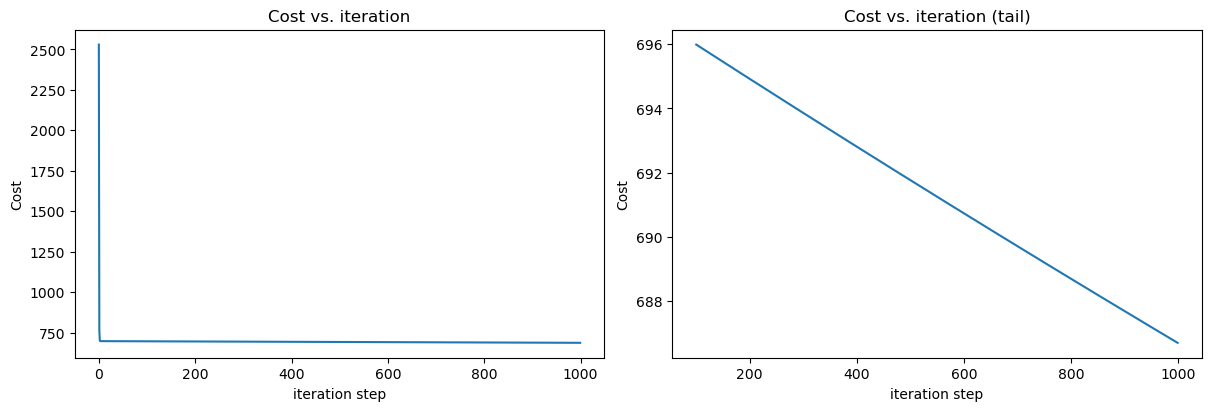

In [43]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_hist)
ax2.plot(100 + np.arange(len(cost_hist[100:])), cost_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()